# 1. K-Means [30 points]
Consider the image “hw2 img.jpg”. The image has 675 rows and 1200 columns which can be
represented as a 3-d array with one axis for the height, width and colour channels. We can rearrange this 3-d array into a 2-d array of shape (810000, 3), where each row represents one pixel in the image and each column represents one of the three colour channels. In this assignment, we will explore clustering methods, applying them in particular to the problem of dividing the pixels of the image into a small number of similar clusters. Consider the K-means clustering algorithm, as described in class. In particular, consider a version in which the inputs to the algorithm are:
- The set of data to be clustered. (i.e., the vectors x(1), x(2), x(3), ...)
- The desired number of clusters, K.
- Initial centroids for the K clusters.

Then the algorithm proceeds by alternating: (1) assigning each instance to the class with the nearest centroid, and (2) recomputing the centroids of each class—until the assignments and centroids stop changing. Please use squared Euclidean distance (Lecture 5, Eq. 2) as the metric for clustering. There are many implementations of K-means publicly available. However, please implement K-Means on your own. Then, use your implementation to cluster the data in the file mentioned above (“hw2_img.jpg”), using K = 8, and the initial centroids as given below in the table:

R| G| B
---|---|---
255 |255 |255
255| 0 |0
128| 0 |0
0 |255 |0
0 |128 |0
0 |0 |255
0 |0 |128
0| 0 |0

You may use any image IO library to load and convert the image into an integer array. The Pillow package has good compatibility with NumPy so you may choose to use that.

Turn in your code, as well as a report on all of the following:

(a) How many clusters there are in the end. (A cluster can “disappear” in one iteration of the
algorithm if no vectors are closest to its centroid.)

(b) The final centroids of each cluster.

(c) The number of pixels associated to each cluster.

(d) Plot the sum of squared Euclidean distance of each pixel to the nearest centroid (Lecture 5,
Eq. 8) against the iteration number of the algorithm.

Visualize your result by replacing each pixel with the centroid to which it is closest, and displaying the resulting image

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
im = Image.open('./HW2_data/1/hw2_img.jpg')
print(im.format, im.size, im.mode)

JPEG (1200, 675) RGB


In [2]:
im_array = np.array(im)
print("Original shape: ",im_array.shape)

# reshape the image array into a 2D array of pixels and 3 color values (RGB)
w, h, d = tuple(im_array.shape)
image_array = np.reshape(im_array, (w * h, d))
print("Reshaped into: ",image_array.shape)

Original shape:  (675, 1200, 3)
Reshaped into:  (810000, 3)


In [3]:
# define the initial centroids
centroids = np.array([
              [255, 255, 255],
              [255, 0, 0],
              [128, 0, 0],
              [0, 255, 0],
              [0, 128, 0],
              [0, 0, 255],
              [0, 0, 128],
              [0, 0, 0]
            ])

# define the value of k
k = 8


In [4]:
# define the euclidean distance function
def distance(a, b):
    return np.linalg.norm(a - b, axis=1)

# define the loss function, as the sum of squared distances to the nearest centroid
def loss(data, centroids, clusters):
    loss = 0
    for i in range(len(data)):
        centroid = centroids[int(clusters[i])]
        loss += np.linalg.norm(data[i] - centroid) ** 2
    return loss

In [5]:
'''
The 5 Steps in K-means Clustering Algorithm
Step 1. Randomly pick k data points as our initial Centroids.

Step 2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.

Step 3. Now assign each data point to the closest centroid according to the distance found.

Step 4. Update centroid location by taking the average of the points in each cluster group.

Step 5. Repeat the Steps 2 to 4 till our centroids don't change.
'''

def kmeans(X, k, centroids):
    # create an array to store the cluster assignments for each data point
    clusters = np.zeros(len(X))

    loss_list = []
    iteration = 0

    # set up a loop that will run the clustering until the cluster assignments stop changing
    while True:
        # create an array to store the new cluster assignments
        new_clusters = np.zeros(len(X))

        # for each data point, assign it to the cluster of the closest centroid
        for i in range(len(X)):
            distances = distance(X[i], centroids)
            cluster = np.argmin(distances)
            new_clusters[i] = cluster

        # if the cluster assignments don't change, stop the loop
        if np.array_equal(clusters, new_clusters):
            break

        # otherwise, keep the new assignments and calculate new centroids
        clusters = new_clusters
        for i in range(k): 
            centroids[i] = np.mean(X[clusters == i], axis=0)
        
        # add the loss to loss_list
        iter_loss = loss(X, centroids, clusters)
        loss_list.append([iteration, iter_loss])
        print("Iteration: ", iteration, " Loss: ", iter_loss)
        iteration += 1
        

    # add the final loss
    loss_list.append([iteration+1, loss(X, centroids, clusters)])

    # return the final cluster assignments and centroids
    return clusters, centroids, loss_list

print("Running k-means...")
clusters, final_centroids, losses = kmeans(image_array, k, centroids)
print("Done")
print("Final centroids:\n", final_centroids)
print("Final clusters:\n", clusters)

Running k-means...


c:\Users\aikho\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\aikho\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\aikho\AppData\Local\Temp\ipykernel_32976\548163469.py:39: RuntimeWarning: invalid value encountered in cast
  centroids[i] = np.mean(X[clusters == i], axis=0)


Iteration:  0  Loss:  911581070.0
Iteration:  1  Loss:  567947623.0
Iteration:  2  Loss:  465739987.0
Iteration:  3  Loss:  429291215.0
Iteration:  4  Loss:  406408347.0
Iteration:  5  Loss:  387952512.0
Iteration:  6  Loss:  374865591.0
Iteration:  7  Loss:  365427281.0
Iteration:  8  Loss:  360261257.0
Iteration:  9  Loss:  357773073.0
Iteration:  10  Loss:  356676525.0
Iteration:  11  Loss:  356068367.0
Iteration:  12  Loss:  355824612.0
Iteration:  13  Loss:  355627092.0
Iteration:  14  Loss:  355414250.0
Iteration:  15  Loss:  355312652.0
Iteration:  16  Loss:  355290571.0
Done
Final centroids:
 [[        225         212         211]
 [        206         157         127]
 [        154         110          90]
 [-2147483648 -2147483648 -2147483648]
 [         95          67          57]
 [         90          93         173]
 [         39          30          30]
 [          5           4          17]]
Final clusters:
 [7. 7. 7. ... 2. 2. 2.]


In [6]:
# check if all clusters are present and count the number of pixels in each cluster
present = {i:False for i in range(8)}
count = {i:0 for i in range(8)}
for i in clusters:
    if i<=7 and i>=0:
        present[i] = True
        count[i] += 1

print("Present: ",present)
print(count)

Present:  {0: True, 1: True, 2: True, 3: False, 4: True, 5: True, 6: True, 7: True}
{0: 25262, 1: 90239, 2: 65866, 3: 0, 4: 59275, 5: 2896, 6: 88213, 7: 478249}


Text(0, 0.5, 'Sum of squared Euclidean distance')

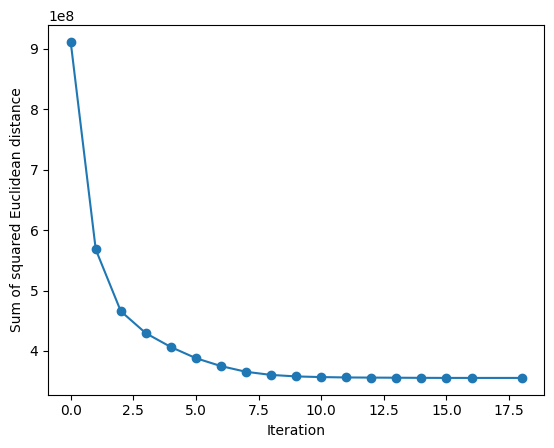

In [7]:
# plot the loss over iterations
x = [x[0] for x in losses]
y = [x[1] for x in losses]
plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel("Iteration")
plt.ylabel("Sum of squared Euclidean distance")

In [8]:
# convert the clusters back into an image
clustered = [final_centroids[int(i)] for i in clusters]

In [9]:
# convert the array of clusters back into an image
clustered = np.reshape(clustered, (w, h, d))
clustered = Image.fromarray(clustered.astype('uint8'), 'RGB')
clustered.save('./HW2_data/1/hw2_img_clustered.jpg')

## Question 1 Answers

### 1(a) How many clusters are there in the end?
There are 7 clusters in the end, cluster 3 "disappeared"

### 1(b) The final centroids of each cluster
- [        225         212         211 ]
- [        206         157         127 ]
- [        154         110          90 ]
- [         95          67          57 ]
- [         90          93         173 ]
- [         39          30          30 ]
- [          5           4          17 ]

### 1(c) The number of pixels associated with each cluster:
- 0: 25262
- 1: 90239
- 2: 65866 
- 3: 0
- 4: 59275
- 5: 2896
- 6: 88213
- 7: 478249

### 1(d) Plot the sum of squared Euclidean distance of each pixel to the nearest centroid:
![graph](./HW2_data/1/plotted_graph.png "Sum of squared Euclidean distance of each pixel to the nearest centroid")

### Resulting image:
![resulting image](./HW2_data/1/hw2_img_clustered.jpg "Sum of squared Euclidean distance of each pixel to the nearest centroid")

# 2. K-Mediods [10 points]

In [10]:
import numpy as np

X2 = np.array([[0, 0], [4, 4], [0, -6], [-5, 2]])
k = 3

def l1_norm(a, b):
    return np.abs(a - b).sum()

def l2_norm(a, b):
    return np.linalg.norm(a - b)

def l_inf_norm(a, b):
    return np.abs(a - b).max()

distances = [l1_norm, l2_norm, l_inf_norm]
for distance in distances:
    print(f"a|b|{distance.__name__}" )
    print("----|-----|-----")
    for point_a in X2:
        for point_b in X2:
            print(f"{point_a}|{point_b}|{distance(point_a, point_b)}")

a|b|l1_norm
----|-----|-----
[0 0]|[0 0]|0
[0 0]|[4 4]|8
[0 0]|[ 0 -6]|6
[0 0]|[-5  2]|7
[4 4]|[0 0]|8
[4 4]|[4 4]|0
[4 4]|[ 0 -6]|14
[4 4]|[-5  2]|11
[ 0 -6]|[0 0]|6
[ 0 -6]|[4 4]|14
[ 0 -6]|[ 0 -6]|0
[ 0 -6]|[-5  2]|13
[-5  2]|[0 0]|7
[-5  2]|[4 4]|11
[-5  2]|[ 0 -6]|13
[-5  2]|[-5  2]|0
a|b|l2_norm
----|-----|-----
[0 0]|[0 0]|0.0
[0 0]|[4 4]|5.656854249492381
[0 0]|[ 0 -6]|6.0
[0 0]|[-5  2]|5.385164807134504
[4 4]|[0 0]|5.656854249492381
[4 4]|[4 4]|0.0
[4 4]|[ 0 -6]|10.770329614269007
[4 4]|[-5  2]|9.219544457292887
[ 0 -6]|[0 0]|6.0
[ 0 -6]|[4 4]|10.770329614269007
[ 0 -6]|[ 0 -6]|0.0
[ 0 -6]|[-5  2]|9.433981132056603
[-5  2]|[0 0]|5.385164807134504
[-5  2]|[4 4]|9.219544457292887
[-5  2]|[ 0 -6]|9.433981132056603
[-5  2]|[-5  2]|0.0
a|b|l_inf_norm
----|-----|-----
[0 0]|[0 0]|0
[0 0]|[4 4]|4
[0 0]|[ 0 -6]|6
[0 0]|[-5  2]|5
[4 4]|[0 0]|4
[4 4]|[4 4]|0
[4 4]|[ 0 -6]|10
[4 4]|[-5  2]|9
[ 0 -6]|[0 0]|6
[ 0 -6]|[4 4]|10
[ 0 -6]|[ 0 -6]|0
[ 0 -6]|[-5  2]|8
[-5  2]|[0 0]|5
[-5  2]|[4 4

## Question 2 Answer
The greater the p-value in a l_p norm, the greater the effect of the largest magnitude component of the vector.

We know that the point x_2 (0, -6) will be the furthest away from point(0,0) due to the magnitude of its largest component of -6 when calculating distance using l_2 norm and l_inf norm. The only scenario when point x_2 is nearer to points x_3 (-5, 2) and x1(4, 4) is when using l_1 norm as the distance function.

`Therefore, it is evident that l_1 norm is used as the distance measure for C.`

Now that there is only A and B left, the difference between them is the crouping of (x_0, x_1) and x_3 in A and (x_3, x_0) and x_1 in B.

Thus, can calculate the distance between x_1, x_0 and x_3, x_0 to check when the points x_3 and x_1 are closest to x_0

l_2_norm(x_1, x_0) = 5.656854249492381

l_2_norm(x_3, x_0) = 5.385164807134504

l_inf_norm(x_1, x_0) = 4

l_inf_norm(x_3, x_0) = 5

`We can see that x_3 is closer to x_0 when using l_2 norm as the distance function, thus, l_2 norm is used as the distance measure for B.`

`We can also see that x_1 is closer to x_0 when using l_inf norm as the distance function. Thus, l_inf norm is used as the distance function for A`

# Question 3 [20 points] 
Download and install the widely used SVM implementation LIBSVM (https://github.com/cjlin1/libsvm, or https://www.csie.ntu.edu.tw/˜cjlin/libsvm/ clicking on either link takes you to the webpage). We expect you to install the package on your own – this is part of learning how to use off-the-shelf machine learning software. Read the documentation to understand how to use it. 

Download promoters folder. In that folder are training.txt and test.txt, which respectively contain 74 training examples and 32 test examples in LIBSVM format. The goal is to predict whether a certain DNA sequence is a promoter or not based on 57 attributes about the sequence (this is a binary classification task). 

Run LIBSVM to classify promoters with different kernels (0-3), using default values for all other parameters. What is your test accuracy for each kernel choice?


In [11]:
from libsvm.svmutil import *

y, x = svm_read_problem('./HW2_data/3/promoters/training.txt')
y_test, x_test = svm_read_problem('./HW2_data/3/promoters/test.txt')

kernel_desc = {
    0: "linear: u'*v",
	1: "polynomial: (gamma*u'*v + coef0)^degree",
	2: "radial basis function: exp(-gamma*|u-v|^2)",
	3: "sigmoid: tanh(gamma*u'*v + coef0)"
}

for i in range(4):
    m = svm_train(y, x, f"-t {i}")
    print(f"Kernel {i}, {kernel_desc[i]}:")
    p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
    print()

Kernel 0, linear: u'*v:
Accuracy = 84.375% (27/32) (classification)

Kernel 1, polynomial: (gamma*u'*v + coef0)^degree:
Accuracy = 81.25% (26/32) (classification)

Kernel 2, radial basis function: exp(-gamma*|u-v|^2):
Accuracy = 90.625% (29/32) (classification)

Kernel 3, sigmoid: tanh(gamma*u'*v + coef0):
Accuracy = 43.75% (14/32) (classification)



## Question 3 answer:
The test accuracies for each kernel choice are as follows:

Kernel 0:
Accuracy = 84.375% (27/32) (classification)

Kernel 1:
Accuracy = 81.25% (26/32) (classification)

Kernel 2:
Accuracy = 90.625% (29/32) (classification)

Kernel 3:
Accuracy = 43.75% (14/32) (classification)

# Question 4 [20 points]
Suppose we are looking for a maximum margin linear classifier through the origin, i.e., the bias b = 0. This means that we have to minimize
$$\frac{1}{2}\left\| w \right\|^{2} \text{ subject to } y^{t}w \cdot x^{t}\ge 1, t = 1, ...,n$$

(a) [15 points] Suppose there are two training examples $x^{(1)} = (1, 1)^{T}$ and $x^{(2)} = (1, 0)^{T}$ with
labels $y^{(1)} = 1$ and $y^{(2)} = −1$. What is the w in this case, and what is the margin γ?

(b) [15 points] How will the parameters w and the margin γ change in the previous question if
the bias/offset parameter b is allowed to be non-zero?

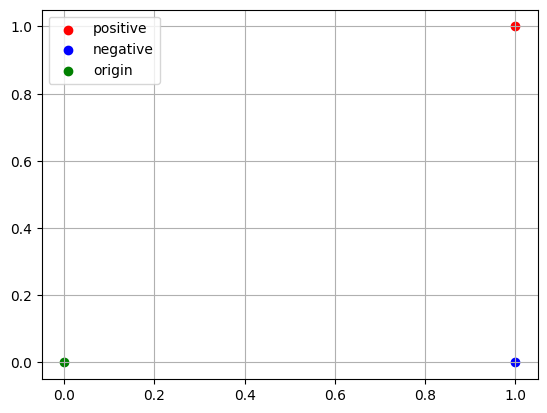

In [12]:
import matplotlib.pyplot as plt
x1 = (1,1)
x2 = (1,0)

# plot the points on the graph
plt.scatter(x1[0], x1[1], color='red', label="positive")
plt.scatter(x2[0], x2[1], color='blue', label="negative")
plt.scatter(0,0, color='green', label="origin")
plt.legend()
plt.grid(True)

## Question 4 answers
### (a) When bias = 0:

<!-- Plotting the 2 training examples makes it is evident that there will be 2 support vectors and the decision boundary will run through the middle of both support vectors.

We can calculate the $\alpha$ values using these equations:

$\alpha_{1}x^{(1)}\cdot x^{(1)}+\alpha_{2}x^{(2)}\cdot x^{(1)} = +1$

$\alpha_{1}x^{(1)}\cdot x^{(2)}+\alpha_{2}x^{(2)}\cdot x^{(2)} = -1$

Plugging in the values of $x^{(1)}$ and  $x^{(2)}$ will result in:

$2\alpha_{1} +\alpha_{2} = +1$

$\alpha_{1}+\alpha_{2} = -1$

Solving for $\alpha_{1}$ and $\alpha_{2}$ will result in: $\alpha_{1} = 2$ and $\alpha_{2} = -3$

The weights can be calculated using: $w=\sum_{t = 1}^{n} α_{t}s_{t}$, where $s_{t}$ is a support vector.

Therefore, $w=2 \begin{pmatrix} 1 \\ 1 \end{pmatrix} + -3\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} -1 \\ 2 \end{pmatrix}$ -->


<!-- $γ^{(t)}(w, w_{0}) = \frac{y^{(t)}(w · x^{(t)} + w_{0})}{\left\| w \right\|}$

the decision boundary will pass through the mid-point of $x^{(1)} \text{ and } x^{(2)}$

$\text{mid-point} = (\frac{1+1}{2}, \frac{1+0}{2}) = (1, 0.5)$ -->

To obtain the values of w: 

minimize $\frac{1}{2}\left\| w \right\|^{2} \text{ subject to } y^{t}w \cdot x^{t}\ge 1$, t = 1, . . . ,n

Lagrangian: $L(w,α) = \frac{1}{2}\left\| w \right\|^{2} + \sum_{t=1}^{n}α_{t}(1-y^{t}(w\cdot x^{t}))$

To find $l(α) = min_{w}𝐿(w, α)$, we solve

$\frac{\partial}{\partial w} L(w,α) = w − \sum_{t = 1}^{n} α_{t}𝑦^{(t)}𝑥^{(t)}$

$w = \sum_{t = 1}^{n} α_{t}𝑦^{(t)}𝑥^{(t)}$. 

Substituting into $𝐿(w, α)$ gives

$l(α) = \sum_{t=1}^{n} α_{t} - \frac{1}{2}\sum_{t=1}^{n}\sum_{t'=1}^{n} α_{t}α_{t'}y^{(t)}y^{(t')}(x^{(t)}\cdot x^{(t')})$, subject to $α_{t}\ge 0$, t = 1, . . . ,n.

Applying the formula to our example in 4(a):

$l(\alpha_1,\alpha_2) = \alpha_1+\alpha_2 - \frac{1}{2}[\alpha_1\alpha_1(1)(1)\begin{pmatrix} 1 \\ 1 \end{pmatrix}\cdot \begin{pmatrix} 1 \\ 1 \end{pmatrix} + \alpha_1\alpha_2(1)(-1)\begin{pmatrix} 1 \\ 1 \end{pmatrix}\cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \alpha_2\alpha_1(-1)(1)\begin{pmatrix} 1 \\ 0 \end{pmatrix}\cdot \begin{pmatrix} 1 \\ 1 \end{pmatrix} + \alpha_2\alpha_2(-1)(-1)\begin{pmatrix} 1 \\ 0 \end{pmatrix}\cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix}]$

$l(\alpha_1,\alpha_2)= \alpha_1+\alpha_2 - \frac{1}{2}[2{\alpha_1}^2 + -2\alpha_1\alpha_2 + {\alpha_2}^2]$

$l(\alpha_1,\alpha_2)= \alpha_1+\alpha_2 - {\alpha_1}^2 + \alpha_1\alpha_2 - \frac{1}{2}{\alpha_2}^2$

To maximize $\alpha_1$:

$\frac{\partial}{\partial \alpha_1} l(\alpha_1,\alpha_2) = 0$

$1 -2\alpha_1+\alpha_2 = 0$  --- (equation 1)

To maximize $\alpha_2$:

$\frac{\partial}{\partial \alpha_2} l(\alpha_1,\alpha_2) = 0$

$1+\alpha_1-\alpha_2 = 0$ --- (equation 2)

Solving equation 1 and equation 2 simultaneously:

$\alpha_1 = 2, \alpha_2 =3$

Solving for the weights:

$w = \alpha_1 (1)\begin{pmatrix} 1 \\ 1 \end{pmatrix} +\alpha_2 (-1)\begin{pmatrix} 1 \\ 0 \end{pmatrix}$

$w = \begin{pmatrix} -1 \\ 2 \end{pmatrix}$

margin γ can be calculated by:

$\gamma^{(t)}(\theta,\theta_0) = \frac{y^{(t)}(\theta \cdot x^{(t)} + \theta_0)}{\left\| w \right\|}$

$\gamma^{(1)}(w, 0) = \frac{1(\begin{pmatrix} -1 \\ 2 \end{pmatrix} \cdot\begin{pmatrix} 1 \\ 1 \end{pmatrix} + 0)}{\sqrt 5}$

$\gamma^{(1)}(w, 0) = \frac{1}{\sqrt{5}}$

$\gamma^{(2)}(w, 0) = \frac{(-1)(\begin{pmatrix} -1 \\ 2 \end{pmatrix} \cdot\begin{pmatrix} 1 \\ 0 \end{pmatrix} + 0)}{\sqrt 5}$

$\gamma^{(2)}(w, 0) = \frac{1}{\sqrt{5}}$

Distance between the positive and negative hyperplanes = $ \frac{2}{\sqrt{5}} = 0.894427191$

### (b) When bias is non-zero

<!-- We will need to recalculate the weights with the bias term included, we can do so by appending 1 to each data point.

$w = \alpha_1 (1)\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} +\alpha_2 (-1)\begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix}$

$w = 2 (1)\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} +3 (-1)\begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix}$

$w = \begin{pmatrix} -1 \\ 2 \\ 0 \end{pmatrix}$ -->

$w_0 = y - w\cdot x$

substituting $x^{(1)}$ into the equation and using the value of $w$ from 4(a):

$w_0 = 1 - \begin{pmatrix} -1\\ 2 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 1 \end{pmatrix}$

$w_0 = 1 -1 = 0$

substituting $x^{(2)}$ into the equation and using the value of $w$ from 4(a):

$w_0 = -1 - \begin{pmatrix} -1 \\ 2 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

$w_0 = -1 - (-1) = 0$

Therefore, there is no change to the values of $w$ when bias is allowed non-zero.

Since the weights and bias are unchanged, the margin is also unchanged.

# Question 5 [20 points]

In this problem, we consider constructing new kernels by combining existing kernels. Recall that for some function K(x, z) to be a kernel, we need to be able to write it as an inner product of vectors from some high-dimensional feature space:
$$K(x, z) = φ(x)^T φ(z)$$
Mercer’s theorem gives a necessary and sufficient condition for a function K to be a kernel: its corresponding kernel matrix has to be symmetric and positive semidefinite, where the elements of a kernel matrix are inner products between all pairs of examples.
Suppose that $K_1(x, z)$ and $K_2(x, z)$ are kernels over $R^n \times R^n$. For each of the cases below, state
whether K is also a kernel. If it is, prove it. If it is not, give a counter example. (Hints: You can
use either Mercer’s theorem or the definition of a kernel, as needed.)

1. $K(x, z) = K_1(x, z)K_2(x, z)$
2. $K(x, z) = aK_1(x, z) − bK_2(x, z)$, where a, b > 0 are real numbers
3. $K(x, z) = \tanh(αK_1(x, z) + C)$, where α, C > 0 are real numbers
4. $K(x, z) = f(x)f(z)$, where $f : R^n → R$ be any real valued function of x

## Question 5 Answers:

#### 1. $K(x, z) = K_1(x, z)K_2(x, z)$

Since $K_1(x, z)$ and $K_2(x, z)$ are valid kernels, using the inner product property:

$K_1(x, z) = φ_1(x)^T φ_1(z)$

$K_2(x, z) = φ_2(x)^T φ_2(z)$

let $f_i(x)$ be the i-th feature value of feature map $φ_1(x)$ and $g_i(x)$ be the i-th feature value of feature map $φ_2(x)$

$K(x, z) = (\sum_{i=1}^n f_i(x)f_i(z)) (\sum_{j=1}^n g_j(x)g_j(z))$

$K(x, z) = \sum_{i=1}^n \sum_{j=1}^n (f_i(x)g_j(x))\space(f_i(z)g_j(z))$

$K(x, z) = \sum_{i=1}^n \sum_{j=1}^n (h_{ij}(x))\space(h_{ij}(z))$, where $h_{ij}(x) = f_i(x)g_j(x)$

$K(x, z) = φ(x)^T φ(z)$, where $h_{ij}(x)$ is the i-th feature value of feature map $φ(x)$

Since $K(x, z)$ is able to be written as an inner product of vectors, it is a valid kernel.

<!-- $K(x, z) = K_1(x, z)K_2(x, z) = (φ_1(x)^T φ_1(z)) (φ_2(x)^T φ_2(z))$

$K(x,z) = (φ_1(x)^T φ_2(x)^T)  (φ_1(z) φ_2(z))$

$K(x,z) = φ(x)^T φ(z)$, where $φ(x)^T = φ_1(x)^T φ_2(x)^T$ and $φ(z) = φ_1(z) φ_2(z)$

Therefore, $K(x, z) = φ(x) \cdot φ(z)$ is a valid kernel. -->



#### 2. $K(x, z) = aK_1(x, z) − bK_2(x, z)$, where a, b > 0 are real numbers

Let $K_1 = K_2 = K$

When a = 1 and b = 2:

$K(x, z) = 1K_1(x, z) − 2K_2(x, z) = 1K_1(x, z) - 2K_1(x, z) = -K_1(x, z)$

Since a kernel must be positive semi-definite, $K(x, z) = K_1(x, z)$, and we know that $K_1(x, z)$ is a valid kernel function, K is not a valid kernel.

<!-- Using the inner product property:

$K_1(x, z) = φ_1(x) \cdot φ_1(z)$

$K_2(x, z) = φ_2(x) \cdot φ_2(z)$ -->

#### 3. $K(x, z) = \tanh(αK_1(x, z) + C)$, where α, C > 0 are real numbers
Given that $K_1(x, z)$ is a valid kernel, $x^TK_1x\ge 0$, where $x \in R^n$

then $x^TaK_1x = ax^TK_1x \ge 0$. Therefore $αK_1(x, z)$ is also a valid kernel.

Since the value of $αK_1(x, z) + C$ is > 0 for all x, z, $K(x, z) = \tanh(αK_1(x, z) + C)$ is a valid kernel.


#### 4. $K(x, z) = f(x)f(z)$, where $f : R^n → R$ be any real valued function of x

$K(x, z) = φ(x) \cdot φ(z)$, where $φ:x → f(x)$

Since the output of f(x) is a scalar, $f(x) \cdot f(z) = f(x)f(z)$

Therefore, $K(x, z) = f(x)f(z)$ is a valid kernel.

<!-- Using Mercer's Theorem, we know that $K(x, z)$ is a valid kernel if and only if $K(x, z)$ is positive semi-definite.

$f(x)f(z)$ is symmetric since $f(x)f(z) = f(z)f(x)$

$K(x, z)$ is positive semi-definite if and only if $x^TKx \ge 0$ for all x, z, where $K = K(x,z)$

$x^TKx = \sum_{i=1}^n \sum_{j=1}^n z_i K_{ij} z_j$

substituting $K(x, z) = f(x)f(z)$

$x^TKx = \sum_{i=1}^n \sum_{j=1}^n z_i f(x_i)f(x_j) z_j$ -->


# References

https://www.youtube.com/watch?v=EItlUEPCIzM&ab_channel=codebasics

https://www.youtube.com/watch?v=lX-3nGHDhQg&ab_channel=Dataquest

https://www.youtube.com/watch?v=3i3klTnGZZM&ab_channel=MathforThought

https://www.askpython.com/python/examples/k-means-clustering-from-scratch

https://www.youtube.com/watch?v=bM4_AstaBZo&t=0s&ab_channel=ritvikmath

https://montjoile.medium.com/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c

https://stats.stackexchange.com/questions/48509/proof-of-closeness-of-kernel-functions-under-pointwise-product

https://www.youtube.com/watch?v=8NYoQiRANpg